In [1]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#the important aspects of the analysis will be discussed in the report

In [2]:
#we get the data from the csv files, where we save the information saved in the log name aas well the last row of the log
folder_path = 'logs/random_search_final/'
file_list = os.listdir(folder_path)
data = []

for file_name in file_list:
    if file_name.endswith('.csv'):
        
        li = file_name.replace('.csv', '').split('-')
        file_path = os.path.join(folder_path, file_name)
        df= pd.read_csv(file_path, sep=';')

        for item in [df['generations'].iloc[-1], df['average_fitness'].iloc[-1], df['best_fitness'].iloc[-1], df['time'].iloc[-1]]:
            li.append(item)

        data.append(li)


In [3]:
df = pd.DataFrame(columns=['id', 'difficulty', 'size', 'selection_method', 'elitism', 'elitism_percentage', 'tournament_size', 'T', 'cooling_rate','crossover_rate', 'crossover_method', 'mutation_rate', 'mutation_method', 'generations_earlystop', 'generations', 'average_fitness', 'best_fitness', 'time'], data=data)
df

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
0,1,easy,150,boltzmann,True,0.15,None,0.1,0.98,1,a_bit_of_all_crossover,0.15,a_bit_of_all_mutation,150,439,13,7,38.486410
1,1,evil,150,boltzmann,True,0.15,None,0.1,0.98,1,a_bit_of_all_crossover,0.15,a_bit_of_all_mutation,150,298,13,7,26.323634
2,1,hard,150,boltzmann,True,0.15,None,0.1,0.98,1,a_bit_of_all_crossover,0.15,a_bit_of_all_mutation,150,299,12,6,26.182021
3,1,normal,150,boltzmann,True,0.15,None,0.1,0.98,1,a_bit_of_all_crossover,0.15,a_bit_of_all_mutation,150,359,14,7,31.325433
4,1,ultimate,150,boltzmann,True,0.15,None,0.1,0.98,1,a_bit_of_all_crossover,0.15,a_bit_of_all_mutation,150,247,12,4,22.207621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,easy,500,tournament,False,None,0.17,None,None,0.75,mixed_multi_point_crossover,0.19,flip_mutation,150,163,24,11,167.102010
996,99,evil,500,tournament,False,None,0.17,None,None,0.75,mixed_multi_point_crossover,0.19,flip_mutation,150,171,25,13,185.428712
997,99,hard,500,tournament,False,None,0.17,None,None,0.75,mixed_multi_point_crossover,0.19,flip_mutation,150,168,22,8,180.185119
998,99,normal,500,tournament,False,None,0.17,None,None,0.75,mixed_multi_point_crossover,0.19,flip_mutation,150,173,24,13,181.533130


In [4]:
df.groupby('difficulty')['best_fitness'].describe()

,count,mean,std,min,25%,50%,75%,max
difficulty,,,,,,,,
easy,200.0,9.510,10.388431,0.0,3.0,6.0,13.00,69.0
evil,200.0,10.175,10.751388,0.0,4.0,6.0,14.00,74.0
hard,200.0,8.570,10.049381,0.0,2.0,5.0,12.00,62.0
normal,200.0,9.695,9.615836,0.0,4.0,6.0,13.25,59.0
ultimate,200.0,13.435,12.025759,2.0,5.0,9.0,21.00,86.0


In [5]:
df.groupby('difficulty')['best_fitness'].describe()

,count,mean,std,min,25%,50%,75%,max
difficulty,,,,,,,,
easy,200.0,9.510,10.388431,0.0,3.0,6.0,13.00,69.0
evil,200.0,10.175,10.751388,0.0,4.0,6.0,14.00,74.0
hard,200.0,8.570,10.049381,0.0,2.0,5.0,12.00,62.0
normal,200.0,9.695,9.615836,0.0,4.0,6.0,13.25,59.0
ultimate,200.0,13.435,12.025759,2.0,5.0,9.0,21.00,86.0


In [6]:
df['size'] = df['size'].astype('int')
means = df.groupby('size')['best_fitness'].mean().reset_index()
medians = df.groupby('size')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means     size  best_fitness
0     50     24.650000
1    100     17.741176
2    150     10.761905
3    200      9.564706
4    250     10.471429
5    500      9.514286
6    750      8.750000
7   1000      6.504348
8   1500      5.487500
9   2000      6.463158
10  5000      4.516667 

medians     size  best_fitness
0     50          23.5
1    100          16.0
2    150           8.0
3    200           8.0
4    250           7.5
5    500           5.0
6    750           5.0
7   1000           4.0
8   1500           4.0
9   2000           4.0
10  5000           3.0


Text(0.5, 1.0, 'Median best fitness by size')

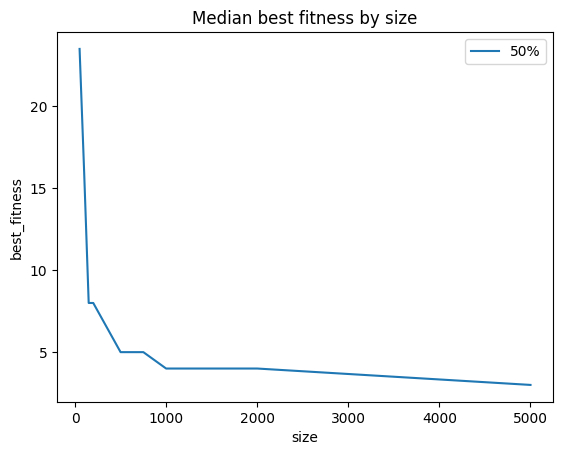

In [7]:
sns.lineplot(x=medians['size'], y=medians['best_fitness'], label='50%').set_title('Median best fitness by size')

In [8]:
df['size'] = df['size'].astype('int')
means = df.groupby(['size', 'selection_method'])['best_fitness'].mean().reset_index()
medians = df.groupby(['size', 'selection_method'])['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means     size selection_method  best_fitness
0     50        boltzmann     29.760000
1     50              fps     17.100000
2     50       tournament     25.314286
3    100        boltzmann     31.066667
4    100              fps     18.885714
5    100       tournament     10.885714
6    150        boltzmann     13.628571
7    150              fps     10.666667
8    150       tournament      8.325000
9    200        boltzmann      8.320000
10   200              fps     12.700000
11   200       tournament      9.533333
12   250        boltzmann     11.066667
13   250              fps      4.600000
14   250       tournament     10.800000
15   500        boltzmann     16.114286
16   500              fps      5.571429
17   500       tournament      6.857143
18   750        boltzmann      8.800000
19   750              fps     10.125000
20   750       tournament      7.114286
21  1000        boltzmann      9.000000
22  1000              fps      5.345455
23  1000       tournament      6.1

In [9]:
means = df.groupby('selection_method')['best_fitness'].mean().reset_index()
medians = df.groupby('selection_method')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means   selection_method  best_fitness
0        boltzmann     12.379412
1              fps      8.661765
2       tournament      9.759375 

medians   selection_method  best_fitness
0        boltzmann           7.0
1              fps           4.5
2       tournament           7.0


In [10]:
means = df.groupby('elitism')['best_fitness'].mean().reset_index()
medians = df.groupby('elitism')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means   elitism  best_fitness
0   False     12.949091
1    True      9.263448 

medians   elitism  best_fitness
0   False           6.0
1    True           6.0


In [11]:
means = df.groupby('elitism_percentage')['best_fitness'].mean().reset_index()
medians = df.groupby('elitism_percentage')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means    elitism_percentage  best_fitness
0                0.01     18.076923
1                0.03     13.280000
2                0.05      9.386667
3                0.07     12.929412
4                0.09      6.706667
5                0.11      7.920000
6                0.13      6.228571
7                0.15      8.682353
8                0.17      7.485714
9                0.19      6.110000
10               None     12.949091 

medians    elitism_percentage  best_fitness
0                0.01          16.0
1                0.03          12.0
2                0.05           8.0
3                0.07          10.0
4                0.09           4.0
5                0.11           6.0
6                0.13           4.0
7                0.15           5.0
8                0.17           4.0
9                0.19           4.0
10               None           6.0


In [12]:
means = df.groupby('tournament_size')['best_fitness'].mean().reset_index()
medians = df.groupby('tournament_size')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means    tournament_size  best_fitness
0             0.01      5.500000
1             0.03     12.266667
2             0.05      8.780000
3             0.07      8.233333
4             0.09      8.266667
5             0.11     11.800000
6             0.13      5.850000
7             0.15      8.333333
8             0.17     13.880000
9             0.19      8.628571
10            None     10.520588 

medians    tournament_size  best_fitness
0             0.01           4.5
1             0.03           5.0
2             0.05           5.0
3             0.07           5.0
4             0.09           8.0
5             0.11           8.0
6             0.13           5.0
7             0.15           8.0
8             0.17          12.0
9             0.19           6.0
10            None           6.0


In [13]:
means = df.groupby(['T', 'cooling_rate'])['best_fitness'].mean().reset_index()
medians = df.groupby(['T', 'cooling_rate'])['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means        T cooling_rate  best_fitness
0    0.1          0.9     11.800000
1    0.1         0.98     16.000000
2    0.1         0.99     13.800000
3    0.1         1.01     26.200000
4      1          0.9      7.066667
5      1         0.98      7.333333
6      1         0.99      8.300000
7      1         1.01     28.400000
8     10          0.9      2.800000
9     10         0.98      4.120000
10    10         0.99      8.666667
11    10         1.01     26.400000
12   100          0.9     12.000000
13   100         0.98     10.066667
14   100         0.99     54.800000
15   100         1.01     41.300000
16     2          0.9      5.250000
17     2         0.98      6.600000
18     2         0.99      4.000000
19     2         1.01     23.600000
20     5          0.9      5.000000
21     5         0.98      5.700000
22     5         0.99     30.800000
23     5         1.01      5.000000
24  None         None      9.193939 

medians        T cooling_rate  best_fitness
0    0.1    

In [14]:
means = df.groupby('crossover_rate')['best_fitness'].mean().reset_index()
medians = df.groupby('crossover_rate')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means   crossover_rate  best_fitness
0            0.7     10.225806
1           0.75      9.972727
2            0.8     12.180000
3           0.85     11.440000
4            0.9      7.333333
5           0.95      9.908108
6              1     12.372414 

medians   crossover_rate  best_fitness
0            0.7           5.0
1           0.75           8.0
2            0.8           8.0
3           0.85           7.0
4            0.9           4.0
5           0.95           6.0
6              1           8.0


In [15]:
means = df.groupby('crossover_method')['best_fitness'].mean().reset_index()
medians = df.groupby('crossover_method')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means                crossover_method  best_fitness
0        a_bit_of_all_crossover      8.581481
1   mixed_multi_point_crossover     10.000000
2  mixed_single_point_crossover     12.392157
3             uniform_crossover     10.243902 

medians                crossover_method  best_fitness
0        a_bit_of_all_crossover           6.0
1   mixed_multi_point_crossover           6.0
2  mixed_single_point_crossover           8.0
3             uniform_crossover           6.0


In [16]:
means = df.groupby(['crossover_rate', 'crossover_method'])['best_fitness'].mean().reset_index()
medians = df.groupby(['crossover_rate', 'crossover_method'])['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means    crossover_rate              crossover_method  best_fitness
0             0.7        a_bit_of_all_crossover      5.900000
1             0.7   mixed_multi_point_crossover      6.285714
2             0.7  mixed_single_point_crossover     10.866667
3             0.7             uniform_crossover     15.533333
4            0.75        a_bit_of_all_crossover      7.840000
5            0.75   mixed_multi_point_crossover      7.942857
6            0.75  mixed_single_point_crossover     11.275000
7            0.75             uniform_crossover     17.200000
8             0.8        a_bit_of_all_crossover     28.600000
9             0.8   mixed_multi_point_crossover      9.700000
10            0.8  mixed_single_point_crossover      7.200000
11            0.8             uniform_crossover     10.114286
12           0.85        a_bit_of_all_crossover     10.088889
13           0.85   mixed_multi_point_crossover     13.533333
14           0.85  mixed_single_point_crossover     10.266667
15

In [17]:
means = df.groupby('mutation_rate')['best_fitness'].mean().reset_index()
medians = df.groupby('mutation_rate')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means   mutation_rate  best_fitness
0          0.01      8.266667
1          0.03      5.877778
2          0.05      7.494737
3          0.07     10.220000
4          0.09     10.741667
5          0.11     10.716667
6          0.13     10.550000
7          0.15     13.095652
8          0.17     10.900000
9          0.19     14.412500 

medians   mutation_rate  best_fitness
0          0.01           5.0
1          0.03           4.0
2          0.05           5.0
3          0.07           6.0
4          0.09           6.0
5          0.11           7.0
6          0.13           6.0
7          0.15          10.0
8          0.17           9.0
9          0.19          10.0


In [18]:
means = df.groupby('mutation_method')['best_fitness'].mean().reset_index()
medians = df.groupby('mutation_method')['best_fitness'].median().reset_index()
print('means',means , '\n\nmedians', medians)

means            mutation_method  best_fitness
0    a_bit_of_all_mutation      5.828571
1    box_exchange_mutation     18.746939
2            flip_mutation      8.038462
3  mixed_exchange_mutation      8.664000 

medians            mutation_method  best_fitness
0    a_bit_of_all_mutation           4.0
1    box_exchange_mutation          17.0
2            flip_mutation           6.0
3  mixed_exchange_mutation           6.0


In [19]:
solved = df.loc[df['best_fitness'] <1]
solved

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
35,105,easy,500,fps,True,0.19,None,None,None,0.7,mixed_multi_point_crossover,0.11,a_bit_of_all_mutation,150,110,12,0,84.412766
37,105,hard,500,fps,True,0.19,None,None,None,0.7,mixed_multi_point_crossover,0.11,a_bit_of_all_mutation,150,112,11,0,72.306456
38,105,normal,500,fps,True,0.19,None,None,None,0.7,mixed_multi_point_crossover,0.11,a_bit_of_all_mutation,150,139,9,0,91.730055
41,106,evil,2000,fps,True,0.09,None,None,None,0.85,a_bit_of_all_crossover,0.11,mixed_exchange_mutation,150,168,13,0,594.954891
55,109,easy,500,tournament,False,None,0.03,None,None,0.7,a_bit_of_all_crossover,0.09,mixed_exchange_mutation,150,50,7,0,27.389362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,88,hard,1000,fps,True,0.09,None,None,None,0.9,a_bit_of_all_crossover,0.05,a_bit_of_all_mutation,150,60,15,0,74.691166
938,88,normal,1000,fps,True,0.09,None,None,None,0.9,a_bit_of_all_crossover,0.05,a_bit_of_all_mutation,150,79,11,0,95.104779
940,89,easy,1500,fps,True,0.19,None,None,None,0.9,mixed_multi_point_crossover,0.07,a_bit_of_all_mutation,150,50,11,0,195.081365
942,89,hard,1500,fps,True,0.19,None,None,None,0.9,mixed_multi_point_crossover,0.07,a_bit_of_all_mutation,150,64,8,0,272.729312


In [20]:
solved['selection_method'].value_counts()

selection_method
fps           45
boltzmann     13
tournament    12
Name: count, dtype: int64

Text(0.5, 1.0, 'Amount of solved Sudokus by Selection method')

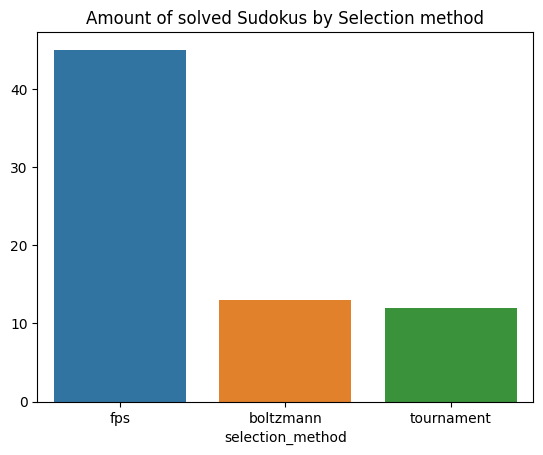

In [63]:
sns.barplot(x=solved['selection_method'].value_counts().index, y=solved['selection_method'].value_counts().values).set_title('Amount of solved Sudokus by Selection method')

In [21]:
solved['size'].value_counts()

size
5000    19
1000    11
500      9
2000     9
1500     8
750      8
200      2
50       2
150      1
250      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Amount Solved Sudokus by Size')

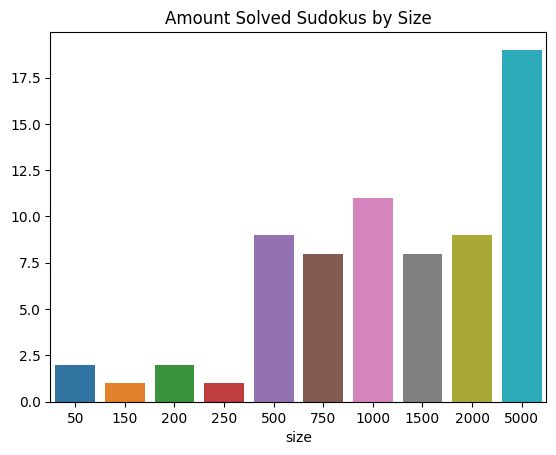

In [61]:
sns.barplot(x=solved['size'].value_counts().index, y=solved['size'].value_counts().values).set_title('Amount of Solved Sudokus by Size')

In [22]:
solved['crossover_method'].value_counts()

crossover_method
a_bit_of_all_crossover          26
mixed_single_point_crossover    19
mixed_multi_point_crossover     17
uniform_crossover                8
Name: count, dtype: int64

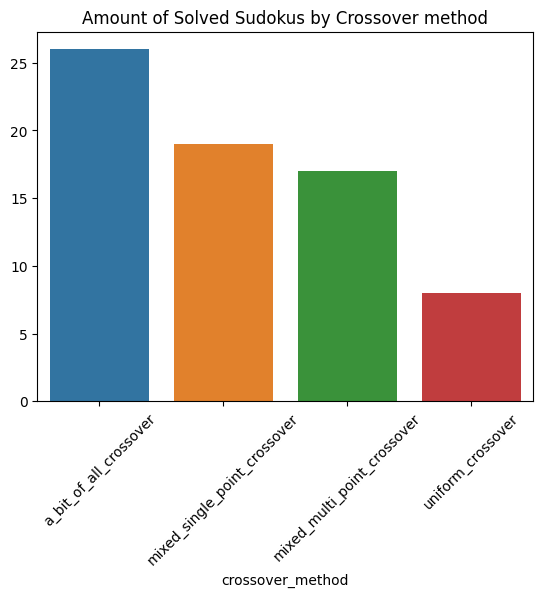

In [62]:
sns.barplot(x=solved['crossover_method'].value_counts().index, y=solved['crossover_method'].value_counts().values).set_title('Amount of Solved Sudokus by Crossover method')
plt.xticks(rotation=45)
plt.show()

In [37]:
solved['crossover_rate'].value_counts()

crossover_rate
0.9     17
0.95    15
0.7     11
0.85    10
0.8      6
0.75     6
1        5
Name: count, dtype: int64

In [35]:
solved['difficulty'].value_counts()

difficulty
hard      30
easy      20
normal    14
evil       6
Name: count, dtype: int64

In [23]:
solved['mutation_method'].value_counts()

mutation_method
a_bit_of_all_mutation      23
flip_mutation              23
mixed_exchange_mutation    19
box_exchange_mutation       5
Name: count, dtype: int64

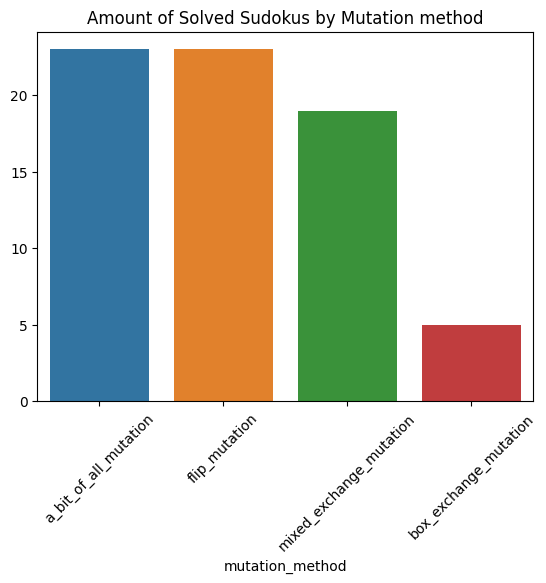

In [64]:
sns.barplot(x=solved['mutation_method'].value_counts().index, y=solved['mutation_method'].value_counts().values).set_title('Amount of Solved Sudokus by Mutation method')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Mutation rate')

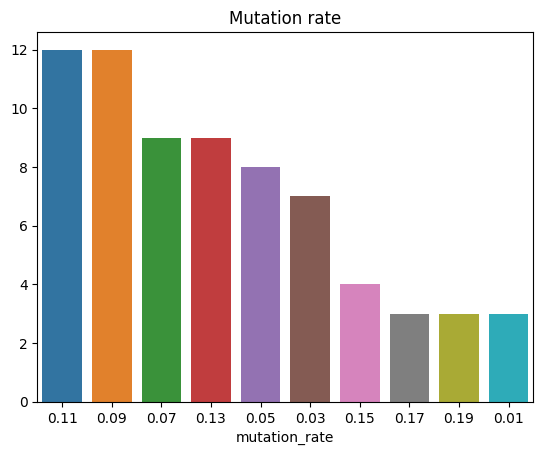

In [50]:
sns.barplot(x=solved['mutation_rate'].value_counts().index, y=solved['mutation_rate'].value_counts().values).set_title('Mutation rate')

In [40]:
solved.groupby(['mutation_method', 'mutation_rate'])['best_fitness'].value_counts()

mutation_method          mutation_rate  best_fitness
a_bit_of_all_mutation    0.01           0               2
                         0.05           0               7
                         0.07           0               3
                         0.09           0               3
                         0.11           0               4
                         0.13           0               2
                         0.17           0               1
                         0.19           0               1
box_exchange_mutation    0.03           0               1
                         0.11           0               2
                         0.13           0               2
flip_mutation            0.01           0               1
                         0.03           0               3
                         0.05           0               1
                         0.07           0               3
                         0.09           0               4
                   

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


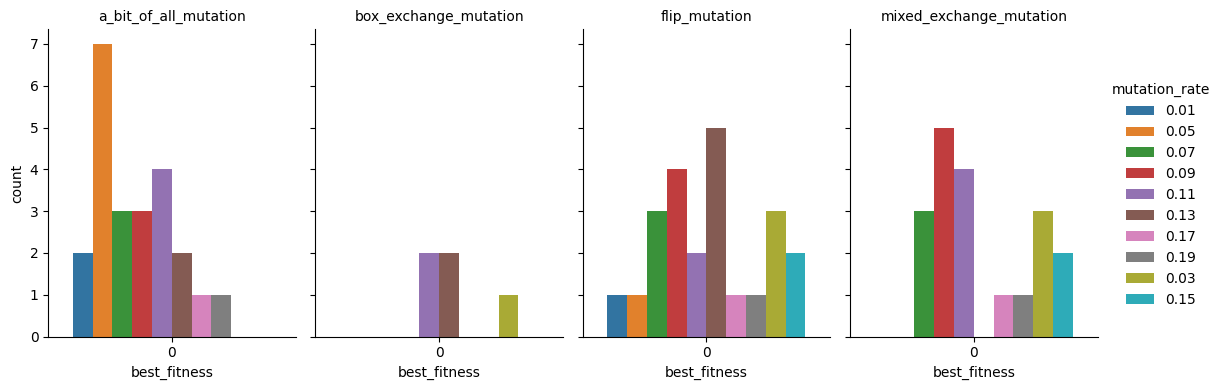

In [53]:
grouped = solved.groupby(['mutation_method', 'mutation_rate'])['best_fitness'].value_counts().unstack(fill_value=0)

# Reset index for easier plotting
grouped = grouped.reset_index().melt(id_vars=['mutation_method', 'mutation_rate'], var_name='best_fitness', value_name='count')

# Create a bar plot
g = sns.catplot(
    data=grouped,
    x='best_fitness', y='count', hue='mutation_rate', col='mutation_method',
    kind='bar', height=4, aspect=0.7
)

# Remove 'mutation method =' from facet titles
def remove_label(text, color, label):
    return text.split('=')[1]

g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Rotate the x-axis labels for better readability


# Display the plot
plt.show()

In [41]:
solved.groupby(['crossover_method', 'crossover_rate'])['best_fitness'].value_counts()

crossover_method              crossover_rate  best_fitness
a_bit_of_all_crossover        0.7             0                4
                              0.75            0                2
                              0.85            0                3
                              0.9             0               10
                              0.95            0                6
                              1               0                1
mixed_multi_point_crossover   0.7             0                4
                              0.75            0                4
                              0.8             0                1
                              0.85            0                3
                              0.9             0                2
                              0.95            0                2
                              1               0                1
mixed_single_point_crossover  0.7             0                1
                              0

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


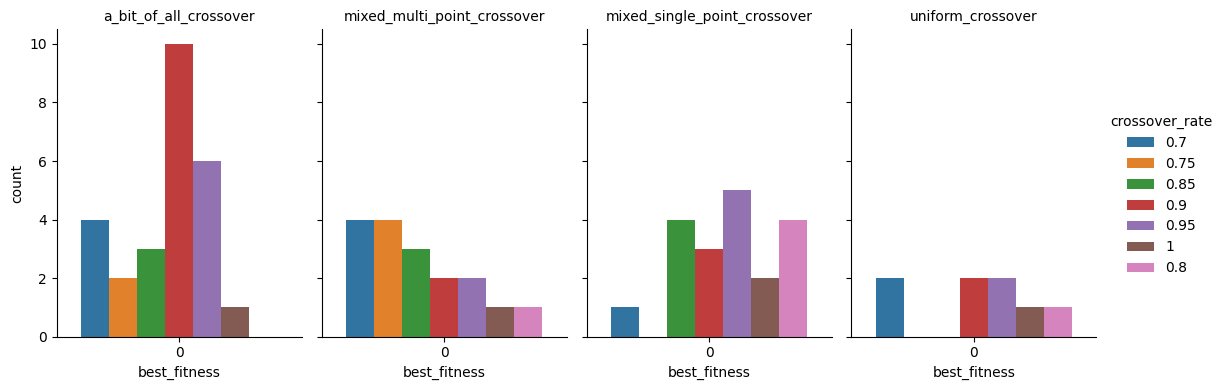

In [54]:
grouped = solved.groupby(['crossover_method', 'crossover_rate'])['best_fitness'].value_counts().unstack(fill_value=0)

# Reset index for easier plotting
grouped = grouped.reset_index().melt(id_vars=['crossover_method', 'crossover_rate'], var_name='best_fitness', value_name='count')

# Create a bar plot
g = sns.catplot(
    data=grouped,
    x='best_fitness', y='count', hue='crossover_rate', col='crossover_method',
    kind='bar', height=4, aspect=0.7
)

# Remove 'mutation method =' from facet titles
def remove_label(text, color, label):
    return text.split('=')[1]

g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Rotate the x-axis labels for better readability


# Display the plot
plt.show()

In [38]:
solved['mutation_rate'].value_counts()

mutation_rate
0.11    12
0.09    12
0.07     9
0.13     9
0.05     8
0.03     7
0.15     4
0.17     3
0.19     3
0.01     3
Name: count, dtype: int64

In [34]:
solved['elitism_percentage'].value_counts()

elitism_percentage
None    13
0.19    12
0.17     9
0.13     9
0.09     8
0.15     7
0.05     6
0.11     3
0.07     2
0.03     1
Name: count, dtype: int64

In [56]:
solved.groupby(['size', 'elitism_percentage'])['best_fitness'].value_counts()

size  elitism_percentage  best_fitness
50    None                0               2
150   None                0               1
200   0.09                0               1
      None                0               1
250   None                0               1
500   0.11                0               1
      0.17                0               1
      0.19                0               4
      None                0               3
750   0.05                0               2
      0.07                0               1
      0.11                0               1
      0.15                0               2
      0.17                0               2
1000  0.05                0               1
      0.07                0               1
      0.09                0               3
      0.15                0               1
      0.17                0               3
      None                0               2
1500  0.15                0               2
      0.17                0          

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


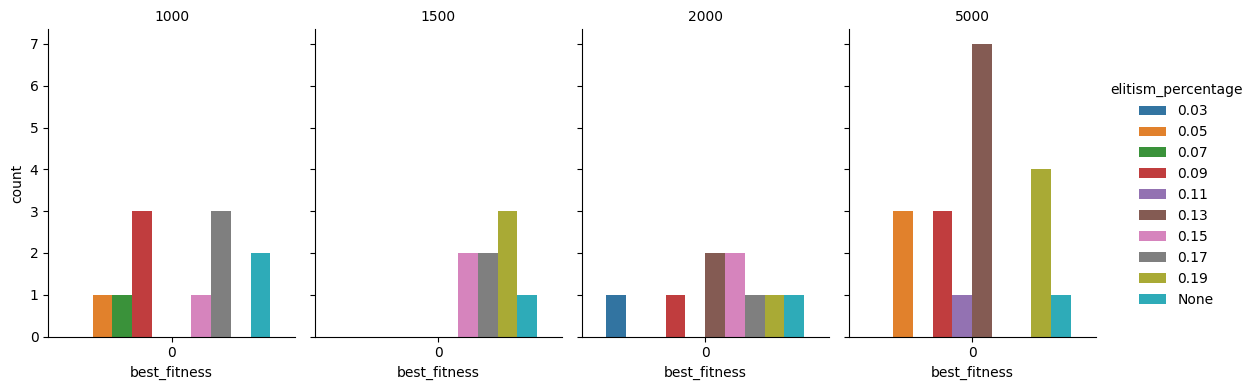

In [60]:
grouped = solved.groupby(['elitism_percentage', 'size'])['best_fitness'].value_counts().unstack(fill_value=0)

# Reset index for easier plotting
grouped = grouped.reset_index().melt(id_vars=['elitism_percentage', 'size'], var_name='best_fitness', value_name='count')
grouped = grouped[grouped['size'] >=1000]
# Create a bar plot
g = sns.catplot(
    data=grouped,
    x='best_fitness', y='count', hue='elitism_percentage', col='size',
    kind='bar', height=4, aspect=0.7
)

# Remove 'mutation method =' from facet titles
def remove_label(text, color, label):
    return text.split('=')[1]

g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Rotate the x-axis labels for better readability


# Display the plot
plt.show()

In [24]:
df.loc[(df['selection_method']=='fps') & (df['size']==5000) ]

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
170,13,easy,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,46,6,0,249.068322
171,13,evil,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,180,5,4,4161.798194
172,13,hard,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,70,3,0,411.047880
173,13,normal,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,40,5,0,229.125626
174,13,ultimate,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,204,6,4,1752.278708
180,131,easy,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,55,16,0,542.407293
181,131,evil,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,91,6,0,1047.233031
182,131,hard,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,193,6,2,2179.475923
183,131,normal,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,51,10,0,542.637650
184,131,ultimate,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,265,11,4,3102.297205


In [25]:
df.loc[df['best_fitness'] <1, 'id'].value_counts()

id
105    3
88     3
177    3
175    3
166    3
13     3
131    3
133    2
21     2
35     2
59     2
54     2
114    2
89     2
109    2
6      1
62     1
197    1
50     1
5      1
38     1
76     1
37     1
36     1
85     1
31     1
29     1
199    1
182    1
189    1
139    1
11     1
110    1
117    1
119    1
120    1
132    1
135    1
14     1
188    1
15     1
157    1
171    1
173    1
178    1
106    1
184    1
96     1
Name: count, dtype: int64

In [36]:
df.loc[df['best_fitness'] <1, 'id'].nunique()

48

In [26]:
df.loc[df['id'] == '105']

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
35,105,easy,500,fps,True,0.19,None,None,None,0.7,mixed_multi_point_crossover,0.11,a_bit_of_all_mutation,150,110,12,0,84.412766
36,105,evil,500,fps,True,0.19,None,None,None,0.7,mixed_multi_point_crossover,0.11,a_bit_of_all_mutation,150,322,8,2,204.354800
37,105,hard,500,fps,True,0.19,None,None,None,0.7,mixed_multi_point_crossover,0.11,a_bit_of_all_mutation,150,112,11,0,72.306456
38,105,normal,500,fps,True,0.19,None,None,None,0.7,mixed_multi_point_crossover,0.11,a_bit_of_all_mutation,150,139,9,0,91.730055
39,105,ultimate,500,fps,True,0.19,None,None,None,0.7,mixed_multi_point_crossover,0.11,a_bit_of_all_mutation,150,499,14,5,322.124862


In [27]:
df.loc[df['id'] == '88']

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
935,88,easy,1000,fps,True,0.09,None,None,None,0.9,a_bit_of_all_crossover,0.05,a_bit_of_all_mutation,150,84,6,0,87.218207
936,88,evil,1000,fps,True,0.09,None,None,None,0.9,a_bit_of_all_crossover,0.05,a_bit_of_all_mutation,150,239,6,2,291.552071
937,88,hard,1000,fps,True,0.09,None,None,None,0.9,a_bit_of_all_crossover,0.05,a_bit_of_all_mutation,150,60,15,0,74.691166
938,88,normal,1000,fps,True,0.09,None,None,None,0.9,a_bit_of_all_crossover,0.05,a_bit_of_all_mutation,150,79,11,0,95.104779
939,88,ultimate,1000,fps,True,0.09,None,None,None,0.9,a_bit_of_all_crossover,0.05,a_bit_of_all_mutation,150,288,11,4,500.022444


In [28]:
df.loc[df['id'] == '177']

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
430,177,easy,1000,fps,True,0.17,None,None,None,0.85,mixed_single_point_crossover,0.13,flip_mutation,150,233,15,0,301.791147
431,177,evil,1000,fps,True,0.17,None,None,None,0.85,mixed_single_point_crossover,0.13,flip_mutation,150,389,16,0,563.647289
432,177,hard,1000,fps,True,0.17,None,None,None,0.85,mixed_single_point_crossover,0.13,flip_mutation,150,113,21,0,150.044356
433,177,normal,1000,fps,True,0.17,None,None,None,0.85,mixed_single_point_crossover,0.13,flip_mutation,150,310,12,2,412.121923
434,177,ultimate,1000,fps,True,0.17,None,None,None,0.85,mixed_single_point_crossover,0.13,flip_mutation,150,499,26,7,692.256178


In [29]:
df.loc[df['id'] == '175']

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
420,175,easy,5000,fps,True,0.05,None,None,None,0.9,a_bit_of_all_crossover,0.03,flip_mutation,150,51,17,0,457.482143
421,175,evil,5000,fps,True,0.05,None,None,None,0.9,a_bit_of_all_crossover,0.03,flip_mutation,150,199,6,2,2086.765582
422,175,hard,5000,fps,True,0.05,None,None,None,0.9,a_bit_of_all_crossover,0.03,flip_mutation,150,49,16,0,487.176188
423,175,normal,5000,fps,True,0.05,None,None,None,0.9,a_bit_of_all_crossover,0.03,flip_mutation,150,50,17,0,485.591452
424,175,ultimate,5000,fps,True,0.05,None,None,None,0.9,a_bit_of_all_crossover,0.03,flip_mutation,150,257,10,4,11016.380245


In [30]:
df.loc[df['id'] == '166']

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
370,166,easy,5000,fps,True,0.13,None,None,None,0.8,mixed_single_point_crossover,0.09,flip_mutation,150,95,13,0,831.344943
371,166,evil,5000,fps,True,0.13,None,None,None,0.8,mixed_single_point_crossover,0.09,flip_mutation,150,251,11,2,2513.713091
372,166,hard,5000,fps,True,0.13,None,None,None,0.8,mixed_single_point_crossover,0.09,flip_mutation,150,71,19,0,697.627777
373,166,normal,5000,fps,True,0.13,None,None,None,0.8,mixed_single_point_crossover,0.09,flip_mutation,150,83,15,0,785.047606
374,166,ultimate,5000,fps,True,0.13,None,None,None,0.8,mixed_single_point_crossover,0.09,flip_mutation,150,389,12,2,4055.898736


In [31]:
df.loc[df['id'] == '13']

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
170,13,easy,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,46,6,0,249.068322
171,13,evil,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,180,5,4,4161.798194
172,13,hard,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,70,3,0,411.047880
173,13,normal,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,40,5,0,229.125626
174,13,ultimate,5000,fps,True,0.13,None,None,None,0.85,mixed_multi_point_crossover,0.03,mixed_exchange_mutation,150,204,6,4,1752.278708


In [32]:
df.loc[df['id'] == '131']

,id,difficulty,size,selection_method,elitism,elitism_percentage,tournament_size,T,cooling_rate,crossover_rate,crossover_method,mutation_rate,mutation_method,generations_earlystop,generations,average_fitness,best_fitness,time
180,131,easy,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,55,16,0,542.407293
181,131,evil,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,91,6,0,1047.233031
182,131,hard,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,193,6,2,2179.475923
183,131,normal,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,51,10,0,542.637650
184,131,ultimate,5000,fps,True,0.09,None,None,None,0.75,mixed_multi_point_crossover,0.07,mixed_exchange_mutation,150,265,11,4,3102.297205
